In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [ ]:
T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1]])
Prior = np.array([0.2,0.8]) 
State = np.array([0,1])
List = []

In [ ]:
def GetHiddenStates(States, N):
    CStates = list( combinations_with_replacement(States,N) )
    Permu = []
    for it in CStates:
        p = list(permutations(it,N)) 
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

HiddenStates = GetHiddenStates(State,8)

La secuencia más probable es: [1 1 1 1 0 0 0 0] que cuenta con una probabilidad de: 0.0001911029760000001 


El estado observable más probable es: [0 0 0 0 0 0 0 0] cuya probabilidad es: 0.13698241367042568 


Se verifica que la suma de todas las probabilidades de los estados observables es: 1.0000000000000007 




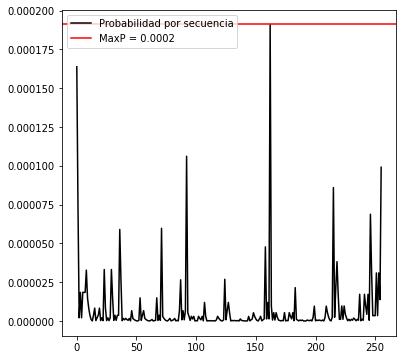

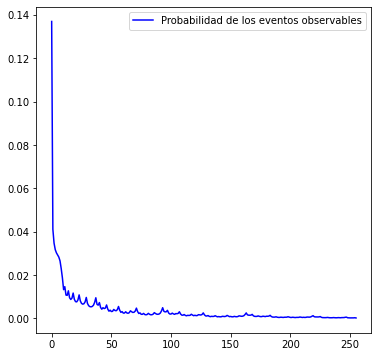

In [ ]:
for L in range(len(HiddenStates)):
    Obs = HiddenStates[L]
    def GetProb(T,E,Obs,State,Prior):
      n = len(Obs)
      p = 1
      p*= Prior[State[0]]
      for i in range(n-1):
          p *= T[ State[i+1], State[i] ]
      for i in range(n):
          p *= E[ Obs[i], State[i] ]
      return p

    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
    maxP = np.max(P)
    ii = np.where( P == np.amax(P))
    
    List.append(HiddenStates[ii][0])

    if (np.array(HiddenStates[ii][0]) == np.array([1,1,1,1,0,0,0,0])).all() == True and (np.array(Obs)==np.array([1,0,0,0,1,0,1,0])).all() == True:
        
        print("La secuencia más probable es:",HiddenStates[ii][0],"que cuenta con una probabilidad de:",maxP,"\n\n")
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(1,1,1)
        ax.plot(P,color='k',label='Probabilidad por secuencia')
        ax.axhline(y=maxP,c='r',label='MaxP = 0.0002')
        ax.legend(loc = 'upper left')
        
        ObsStates = GetHiddenStates([0,1],8)
        
        NObs = ObsStates.shape[0]
        
        PObs = np.zeros(NObs)
        
        for j in range(NObs):
            
            dim = HiddenStates.shape[0]
            P = np.zeros(dim)
            
            for i in range(dim):
                P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
                
            PObs[j] = np.sum(P)
        
        fig2 = plt.figure(figsize=(6,6))
        ax1 = fig2.add_subplot(1,1,1)
        ax1.plot(PObs,label = 'Probabilidad de los eventos observables',c='b')
        ax1.legend(loc = 'upper right')
        
        maxP = np.max(PObs)
        jj = np.where( PObs == np.amax(PObs))
        
        print("El estado observable más probable es:",ObsStates[jj][0],"cuya probabilidad es:",maxP,"\n\n")
        
        print("Se verifica que la suma de todas las probabilidades de los estados observables es:",np.sum(PObs),"\n\n")

In [ ]:
def most_repeted_row(Matrix):
    Matrix = np.ascontiguousarray(Matrix)
    void_dt = np.dtype((np.void,Matrix.dtype.itemsize*np.prod(Matrix.shape[1:])))
    _,ids,count = np.unique(Matrix.view(void_dt).ravel(),return_index=1,return_counts=1)
    largest_count_id = ids[count.argmax()]
    most_frequent_row = Matrix[largest_count_id]
    return most_frequent_row,len(ids)

print("Las secuencia oculta más probable de todos los tipos de secuencias observables es: "+str(most_repeted_row(List)[0])+". \
Esta se presenta como la más probable en "+str(most_repeted_row(List)[1])+" combinaciones distintas de 8 datos de S o C. Esto significa \
un 7,81% de probabilidad.")

Las secuencia oculta más probable de todos los tipos de secuencias observables es: [0 0 0 0 0 0 0 0]. Esta se presenta como la más probable en 20 combinaciones distintas de 8 datos de S o C. Esto significa un 7,81% de probabilidad.
